# Sentinel-1 <img align="right" src="../Supplementary_data/DE_Africa_Logo_Stacked_RGB_small.jpg">


* **Products used:** 
[s1_rtc](https://explorer.digitalearth.africa/s1_rtc)

## Background

The [Sentinel-1](https://sentinel.esa.int/web/sentinel/missions/sentinel-1) mission is composed of a constellation of two Synthetic Aperture Radar (SAR) satellites, Sentinel-1A and Sentinel-1B, sharing the same orbital plane. Sentinel-1 provides dual polarisation capability, very short revisit times, and rapid product delivery.The mission currently collects data every 12 days over Africa at a spatial resolution of approximately 20m. Sentinel-1A was launched on 3 April 2014 and Sentinel-1B followed on 25 April 2016. Two other spacecraft (Sentinel-1C and Sentinel-1D) are planned to replace the first two satellites at the end of their operational lifespan. For more information on the Sentinel-1 platforms and applications, check out the [European Space Agency](https://www.esa.int/Applications/Observing_the_Earth/Copernicus/Sentinel-1) website.

SAR data has the advantage of operating at wavelengths not impeded by cloud cover or a lack of illumination and can acquire data over a site during the day or night, and under most weather conditions. The Sentinel-1 mission is the European Radar Observatory for the Copernicus joint initiative of the European Commission (EC) and the European Space Agency (ESA) that can offer reliable and repeated wide area monitoring with its SAR instrument.

Radar backscatter measures the amount of microwave radiation reflected back to the centre from the ground surface. This measurement is sensitive to surface roughness, Moisture content and viewing geometry. DEAfrica provides Sentinel one backscatter as Radiometric Terrain Corrected (RTC) gamma-0 (γ0) where variation due to changing observation geometries has been mitigated.

The C-SAR instrument on Sentinel-1 supports operation in dual polarisation (HH+HV, VV+VH) that is useful for land cover classification and sea-ice applications. Sentinel-1 operates in four exclusive acquisition modes:
* Strip Map Mode: 80 km swath, 5 x 5 m spatial resolution
* Interferometric Wide Swath: 250 km swath, 5 x 20 m spatial resolution
* Extra-Wide Swath Mode: 400 km swath, 20 x 40 m spatial resolution
* Wave-Mode: 20 x 20 km, 5 x 5 m spatial resolution

<img align='Center'
     src='../Supplementary_data/Sentinel_1/S1Modes.jpg' Width='600'>

The dual polarisation backscatter timeseries can be used in applications for forest, agriculture, wetlands and land cover classification. SAR's ability to see through clouds makes it critical for mapping and monitoring Land cover changes in the wet tropics.The rapid data dissemination and short revisit cycles of Sentinel-1 together with its interferometric capabilities will also benefit emergency response users, such as the United Nations [International Charter on Space and Major Disasters](https://disasterscharter.org/web/guest/home;jsessionid=83C5354659FD4EFBE0A8D388BBA5B56F.jvm1), in emergency situations such as floods, earthquakes, volcanic eruptions and landslides.

DEAfrica Sentinel one backscatter productive to be compliant with the [CEOS Analysis Ready Data for Land (CARD4L)](https://ceos.org/ard/) specification. Sentinel-1 Radiometrically Terrain Corrected over the whole [continent](https://explorer.digitalearth.africa/products/s1_rtc) is Provided since 2017 to present containing both VH and VV Polarisation bands. 

## Description

In this notebook we will load sentinel-1 Radiometric Terrain Corrected (RTC) SAR backscatter data using `dc.load()` to return a time series of satellite images. The returned xarray.Dataset dataset will contain analysis ready images over Ghana in 2021.

Topics covered include:
1. Inspecting the Sentinel-1 product and measurements available in the datacube
2. Using the native `dc.load()` function to load in Sentinel-1 data

An example of using Sentinel-1 for classify water is available under the `Real_world_examples` folder, [Radar Water Detection](../Real_world_examples/Radar_water_detection.ipynb)
***

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell.

### Load packages

In [1]:
%matplotlib inline
import datacube
import sys
import math 
import matplotlib.pyplot as plt
from deafrica_tools.plotting import rgb 
from deafrica_tools.plotting import display_map

/env/lib/python3.6/site-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.7.2-CAPI-1.11.0 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


### Connect to the datacube

In [2]:
dc = datacube.Datacube(app="Sentinel_1")

## Available products and measurements

### List products

We can use datacube's `list_products` functionality to inspect DE Africa's SAR products that are available in the datacube. The table below shows the product names that we will use to load the data, a brief description of the data, and the satellite instrument that acquired the data.

In [3]:
product = "s1_rtc"

### List measurements

We can further inspect the data available for each SAR product using datacube's `list_measurements` functionality. The table below lists each of the measurements available in the data.

In [4]:
measurements = dc.list_measurements()
measurements.loc[product]

,name,dtype,units,nodata,aliases,flags_definition
measurement,,,,,,
vv,vv,float32,1,NaN,[VV],NaN
vh,vh,float32,1,NaN,[VH],NaN
angle,angle,uint8,1,255,"[ANGLE, local_incidence_angle]",NaN
area,area,float32,1,NaN,"[AREA, normalised_scattering_area]",NaN
mask,mask,uint8,1,0,[MASK],"{'qa': {'bits': [0, 1, 2, 3, 4, 5, 6, 7], 'val..."


## Load Sentinel-1 dataset using `dc.load()`

Now that we know what products and measurements are available for the product, we can load data from the datacube using `dc.load`.

In the example below, we will load Sentinel-1 for part of Ghana in 2021. 

We will load data from two Polarisation bands,`VV` and `VH`(in units of dB) which correspond to the polarisation of the light sent and received by the satellite, as well as masked data (`'mask'`). *VV* refers to the satellite sending out vertically-polarised light and receiving vertically-polarised light back, whereas *VH* refers to the satellite sending out vertically-polarised light and receiving horizontally-polarised light back. 

By specifying `output_crs='EPSG:6933'` and `resolution=(-20, 20)`, we request that datacube reproject our data to the NSIDC EASE-Grid 2.0 Global coordinate reference system (CRS), with 20 x 20m pixels. If these options are not set, the data will be loaded in native EPSG:4326 CRS.

> Note: For a more general discussion of how to load data using the datacube, refer to the [Introduction to loading data](../Beginners_guide/03_Loading_data.ipynb) notebook.

In [5]:
# Define the area of interest
latitude = 5.423
longitude = -0.464
buffer = 0.02
time = ('2021')

In [6]:
#add spatio-temporal extent to the query
query = {
    'x': (longitude-buffer, longitude+buffer),
    'y': (latitude+buffer, latitude-buffer),
    'output_crs': 'epsg:6933',
    'resolution':(-20,20),
    'time':time,
}

### Visualise the selected area 

In [7]:
display_map(x=(longitude-buffer, longitude+buffer), y=(latitude+buffer, latitude-buffer))

In [8]:
#loading the data with the mask band included 
bands = ['vv','vh','mask']
ds_S1 = dc.load(product='s1_rtc',
             measurements=bands,
             **query)

print(ds_S1)

<xarray.Dataset>
Dimensions:      (time: 4, x: 193, y: 255)
Coordinates:
  * time         (time) datetime64[ns] 2021-02-16T18:18:21.941192 ... 2021-03...
  * y            (y) float64 6.934e+05 6.934e+05 ... 6.883e+05 6.883e+05
  * x            (x) float64 -4.669e+04 -4.667e+04 ... -4.287e+04 -4.285e+04
    spatial_ref  int32 6933
Data variables:
    vv           (time, y, x) float32 0.044939723 0.05681095 ... 0.027485104
    vh           (time, y, x) float32 0.029125791 0.039110452 ... 0.00016971807
    mask         (time, y, x) uint8 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
Attributes:
    crs:           epsg:6933
    grid_mapping:  spatial_ref


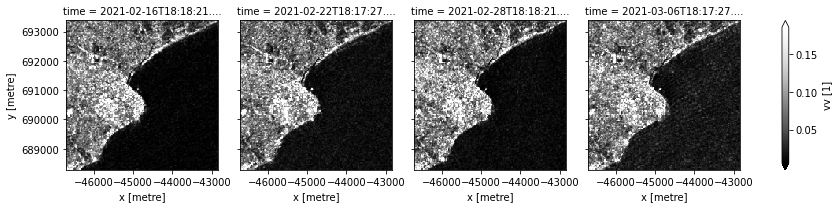

In [9]:
# Plot all VV observations for the year
ds_S1.vv.plot(cmap="Greys_r", robust=True, col="time", col_wrap=4);

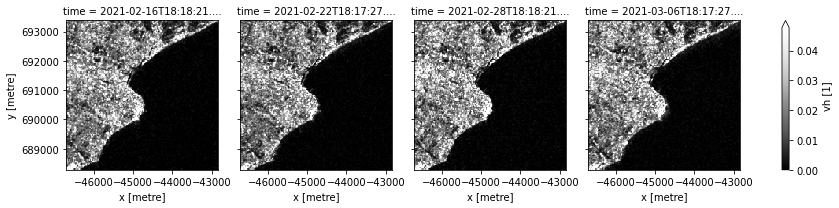

In [10]:
# Plot all VH observations for the year
ds_S1.vh.plot(cmap="Greys_r", robust=True, col="time", col_wrap=4);

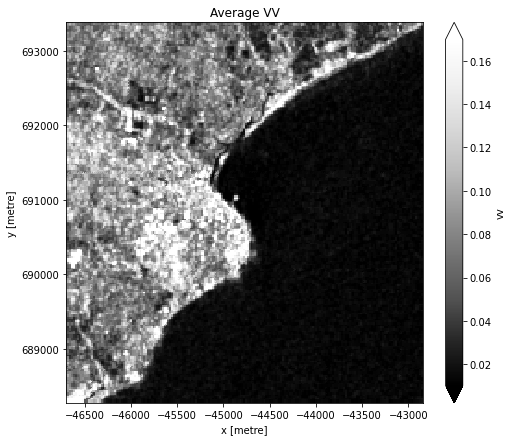

In [11]:
# Plot the average of all VV observations
mean_vv = ds_S1.vv.mean(dim="time")

fig = plt.figure(figsize=(8, 7))
mean_vv.plot(cmap="Greys_r", robust=True)
plt.title("Average VV");

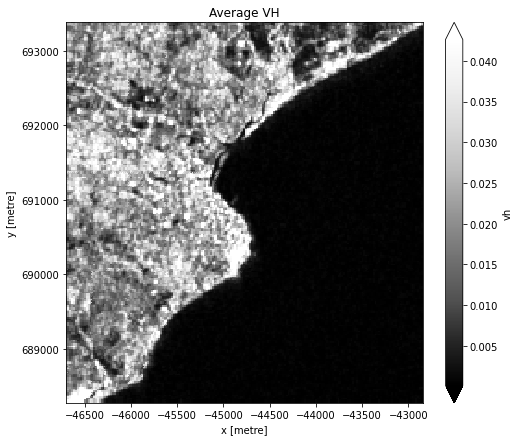

In [12]:
# Plot the average of all VH observations
mean_vh = ds_S1.vh.mean(dim="time")

fig = plt.figure(figsize=(8, 7))
mean_vh.plot(cmap="Greys_r", robust=True)
plt.title("Average VH");

You may have noticed that the water in the individual *VV* and *VH* images isn't a consistent colour.
The distortion you're seeing is a type of noise known as speckle, which gives the images a grainy appearence.
If we want to be able to easily decide whether any particular pixel is water or land, we need to reduce the chance of misinterpreting a water pixel as a land pixel due to the noise.
Speckle can be removed through filtering.
If interested, you can find a technical introduction to speckle filtering [here](https://earth.esa.int/documents/653194/656796/Speckle_Filtering.pdf) and the way to do the filtering in [Radar Water Detection](../Real_world_examples/Radar_water_detection.ipynb) notebook.

In [13]:
#creation of a new band (VH/VV=vhvv) for RGB display 
ds_S1['vhvv'] = ds_S1.vh / ds_S1.vv

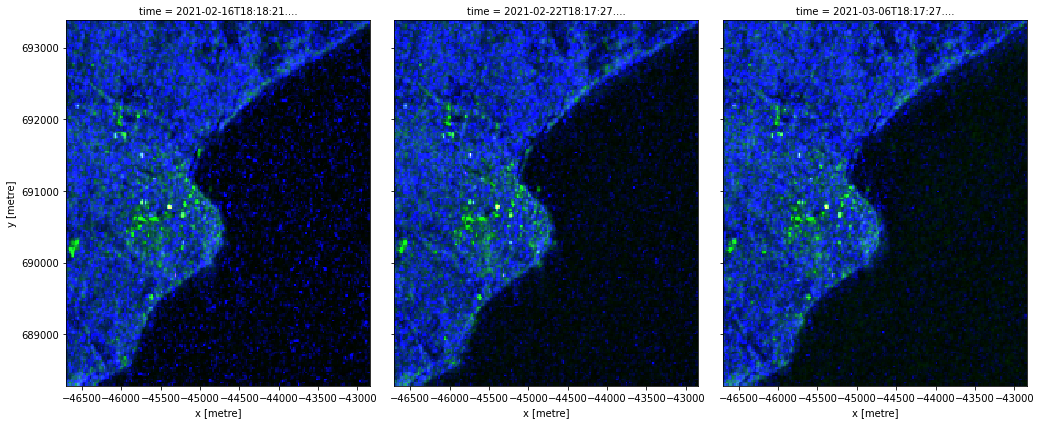

In [14]:
# Set the timesteps to visualise
timesteps = [0,1,3]

# Generate RGB plots at each timestep
rgb(ds_S1, bands=['vh','vv','vhvv'], index=timesteps)

As the Sentinel-1 false color composite over an area in Ghana shows, water represents in black, bare earth surface in blue and urban areas in green tone. The salt and pepper a.k.a speckle noise in the water areas is so obvious. 

## Histogram Analysis for Sentinel-1 Dataset 

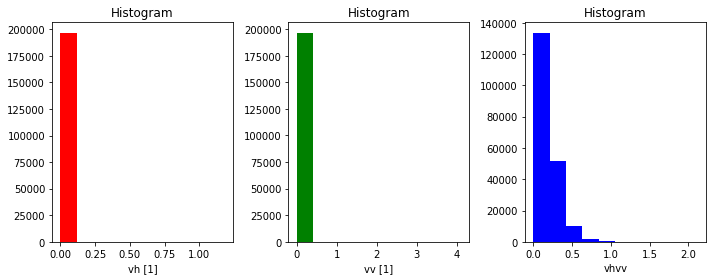

In [15]:
#plotting each polorisation bands following converting to dB values 
fig, ax = plt.subplots(1, 3, figsize=(10, 4))
ds_S1.vh.plot.hist(ax=ax[0], facecolor='red')
ds_S1.vv.plot.hist(ax=ax[1], facecolor='green')
ds_S1.vhvv.plot.hist(ax=ax[2], facecolor='blue')
plt.tight_layout()

***

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Africa data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks).

**Compatible datacube version:** 

In [16]:
print(datacube.__version__)

1.8.4.dev52+g07bc51a5


**Last Tested:**

In [17]:
from datetime import datetime
datetime.today().strftime('%Y-%m-%d')

'2021-04-23'